本篇中选取的数据集为Wine Reviews。由于该数据集中包含两个csv文件，首先将两个文件合并。

In [ ]:
import pandas as pd
import os
Folder_Path = r'D:\python\wine'          
SaveFile_Path =  r'D:\python'       
SaveFile_Name = r'wine.csv'              
os.chdir(Folder_Path)
file_list = os.listdir()
df1 = pd.read_csv(Folder_Path +'\\'+ file_list[0])   
df2 = pd.read_csv(Folder_Path +'\\'+ file_list[1]) 
df3 = pd.concat([df1,df2],ignore_index = True,verify_integrity = True)
df3.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig")

读取合并后的文件内容

In [2]:
import pandas as pd
df1 = pd.read_csv("D:/python/wine.csv")
print(df1)

        Unnamed: 0  Unnamed: 0.1   country  \
0                0             0     Italy   
1                1             1  Portugal   
2                2             2        US   
3                3             3        US   
4                4             4        US   
...            ...           ...       ...   
280896      280896        150925     Italy   
280897      280897        150926    France   
280898      280898        150927     Italy   
280899      280899        150928    France   
280900      280900        150929     Italy   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
280896  Many people 

d:\python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


该组数据中只有point和price为数值属性，后续进行计算缺失值、五数概括和可视化处理。其余属性中，country、 province、 region_1、variety 和winery重复率较高可以计算频数，剩下的属性频率太低不再进行分析，计数时只选取前10个频率较高的数据。
1、country:

In [3]:
import matplotlib.pyplot as plt
import csv
from collections import Counter
filename = "D:/python/wine.csv"
list1 = []
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    country = [row[2] for row in reader]
def counter1(arr):
    return Counter(arr).most_common(10)
print(counter1(country))

[('US', 116901), ('France', 43191), ('Italy', 43018), ('Spain', 14913), ('Portugal', 11013), ('Chile', 10288), ('Argentina', 9431), ('Australia', 7286), ('Austria', 6402), ('New Zealand', 4739)]


2、province

In [4]:
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    province = [row[7] for row in reader]
print(counter1(province))

[('California', 80755), ('Washington', 18389), ('Tuscany', 13178), ('Bordeaux', 12052), ('Oregon', 9962), ('Northern Spain', 8743), ('Burgundy', 8288), ('Mendoza Province', 8006), ('Piedmont', 7822), ('Veneto', 6678)]


3、region

In [5]:
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    region = [row[8] for row in reader]
print(counter1(region))

[('', 46307), ('Napa Valley', 10689), ('Columbia Valley (WA)', 9099), ('Russian River Valley', 6662), ('California', 6091), ('Mendoza', 5887), ('Paso Robles', 5403), ('Willamette Valley', 4397), ('Alsace', 3737), ('Rioja', 3362)]


4、variety

In [6]:
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    variety = [row[13] for row in reader]
print(counter1(variety))

[('Pinot Noir', 27563), ('Chardonnay', 26235), ('Cabernet Sauvignon', 22272), ('Red Blend', 19008), ('Bordeaux-style Red Blend', 14262), ('Sauvignon Blanc', 11287), ('Riesling', 10713), ('Syrah', 9967), ('Merlot', 8172), ('Zinfandel', 6513)]


5、winery

In [7]:
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    winery = [row[14] for row in reader]
print(counter1(winery))

[('Williams Selyem', 585), ('Testarossa', 492), ('DFJ Vinhos', 473), ('Chateau Ste. Michelle', 419), ('Wines & Winemakers', 391), ('Georges Duboeuf', 384), ('Concha y Toro', 380), ('Columbia Crest', 376), ('Louis Latour', 353), ('Kendall-Jackson', 346)]


计算price的缺失值个数以及五数概括

In [8]:
import numpy as np
def fiveNumber(nums):
    """五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）"""
    Minimum=min(nums)
    Maximum=max(nums)
    Q1=np.percentile(nums,25)
    Median=np.median(nums)
    Q3=np.percentile(nums,75)
    print(Minimum,Q1,Median,Q3,Maximum)
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    column = [row[6] for row in reader]
len1 = len(column)
num = list(filter(None, column))
len2 = len(num)
num = list(map(float, num))
sum = len1 - len2
print("price的缺失值个数为:",sum)
print("price的五数概括是：",end=' ')
fiveNumber(num)

price的缺失值个数为: 22691
price的五数概括是： 4.0 16.0 25.0 40.0 3300.0


计算point的缺失值个数以及五数概括

In [9]:
with open(filename, 'r',encoding='UTF-8') as file:
    next(file)
    reader = csv.reader(file)
    point = [row[5] for row in reader]
point_len1 = len(point)
point_num = list(filter(None, point))
point_len2 = len(point_num)
point_num = list(map(float, point_num))
point_sum = point_len1 - point_len2
print("point的缺失值个数为:",point_sum)
print("point的五数概括是：",end=' ')
fiveNumber(point_num)

point的缺失值个数为: 0
point的五数概括是： 80.0 86.0 88.0 90.0 100.0


对price进行可视化处理，主要包括盒图和直方图，盒图中由于最大值为离群点，且距离最大观测值较远，则将最大值限定为最大观测值，没有画出离群点。

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec203684c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec20368f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec2035cc08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec20373d88>],
 'fliers': [],
 'means': []}

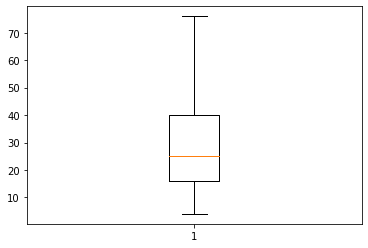

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(num,showfliers = False)   

对属性point进行可视化处理。

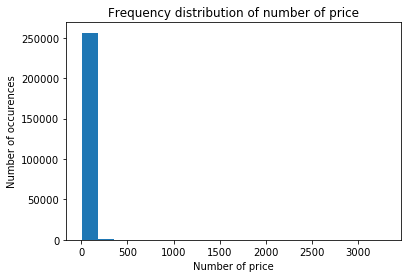

In [11]:
import pylab as pl
def draw_hist(lenths,string1):  
    data = lenths 
    bins = np.linspace(min(data),max(data),20)
    pl.hist(data,bins)
    pl.xlabel("Number of %s"%(string1))
    pl.ylabel('Number of occurences')
    pl.title("Frequency distribution of number of %s"%(string1))
    pl.show()
draw_hist(num,string1 = 'price')


{'whiskers': [<matplotlib.lines.Line2D at 0x1ec204b9648>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec204b9f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec204b3d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec204bde88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec204c1d08>],
 'means': []}

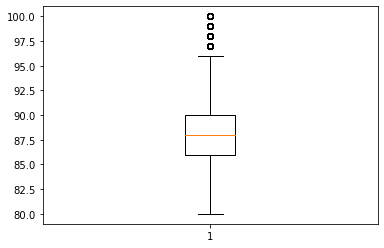

In [12]:
plt.boxplot(point_num)

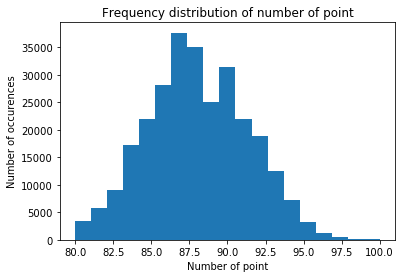

In [13]:
draw_hist(point_num,'point')

对缺失值进行填补的部分，由于point无缺失值，不再对其进行处理。
1、直接剔除缺失值，在上述进行可视化处理的过程中就是直接剔除了缺失值，这一步不再重复操作。
2、用最高频率值来填补缺失值，选取了众数替代了空值，以下是处理后的盒图以及直方图。

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec20994388>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec20bca048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec20530e08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec20bef208>],
 'fliers': [],
 'means': []}

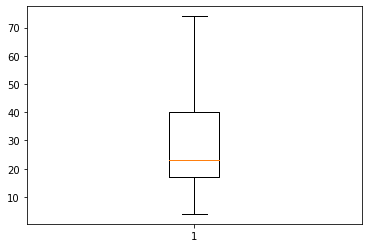

In [14]:
rows = Counter(num).most_common(1)
mode = [x[0] for x in rows]
#print(mode)
miss_point = list(point)
mode_list = list(column)
for i, x in enumerate(mode_list):
    if x == '':
        mode_list[i] = mode[0]
        miss_point[i] = ''
mode_list = list(map(float, mode_list))
plt.boxplot(mode_list,showfliers = False)   

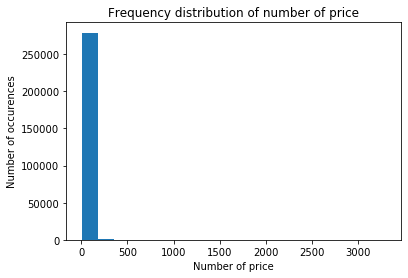

In [15]:
draw_hist(mode_list,'price')

3、通过属性的相关关系来填补缺失值，通过计算可以得到point和price的相关系数为0.437456，所以可以计算point以及price两个属性间的回归函数，从而填充缺失值，以下是处理过程以及填补后的可视化处理。

In [16]:
correlations = df3.corr()['price'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
miss_point = list(filter(None, miss_point))
miss_point = list(map(float, miss_point))

Most Positive Correlations:
 Unnamed: 0   -0.020996
points        0.437456
price         1.000000
Name: price, dtype: float64


自变量---源数据: (258210, 1) ；  训练集: (206568, 1) ；  测试集: (51642, 1)
因变量---源数据: (258210, 1) ；  训练集: (206568, 1) ；  测试集: (51642, 1)


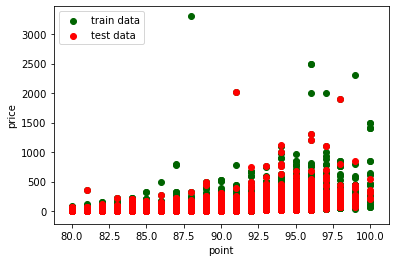

In [17]:
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
miss_point = DataFrame(miss_point)
num = DataFrame(num)
X_train,X_test,Y_train,Y_test = train_test_split(miss_point,num,train_size=0.8)
print("自变量---源数据:",miss_point.shape, "；  训练集:",X_train.shape, "；  测试集:",X_test.shape)
print("因变量---源数据:",num.shape, "；  训练集:",Y_train.shape, "；  测试集:",Y_test.shape)
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")
plt.scatter(X_test, Y_test, color="red", label="test data")
plt.legend(loc=2)
plt.xlabel("point")
plt.ylabel("price")
plt.show()

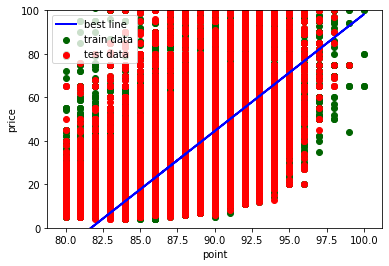

拟合参数:截距 [-438.97589662] ,回归系数： [[5.37191396]]
最佳拟合线: Y =  [-438.98] + [5.37] * X


In [18]:
model = LinearRegression()
model.fit(X_train,Y_train)
a  = model.intercept_
b = model.coef_
y_train_pred = model.predict(X_train)
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
plt.legend(loc=2)
plt.ylim(0,100)
plt.xlabel("point")
plt.ylabel("price")
plt.show()
print("拟合参数:截距",a,",回归系数：",b)
print("最佳拟合线: Y = ",np.round(a,2),"+",np.round(b[0],2),"* X")


{'whiskers': [<matplotlib.lines.Line2D at 0x1ec0b991d88>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec03ec4c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec0b9afe88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec0a9326c8>],
 'fliers': [],
 'means': []}

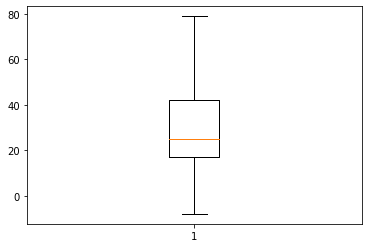

In [19]:
r_list = list(column)
for i, x in enumerate(r_list):
    if x == '':
        r_list[i] = int((5.33)*point_num[i] - 435.23)
r_list = list(map(float, r_list))
plt.boxplot(r_list,showfliers = False)              

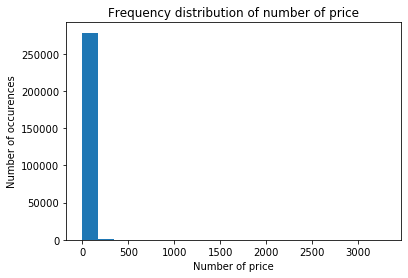

In [20]:
draw_hist(r_list,'price')

4、通过数据对象之间point的相似性进行缺失值处理，对point进行排序，取值相近的point的数据对象的price值进行填充，以下是处理过程以及填补后的可视化处理。

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec276f17c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec276f1f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec276eed88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec276f5e88>],
 'fliers': [],
 'means': []}

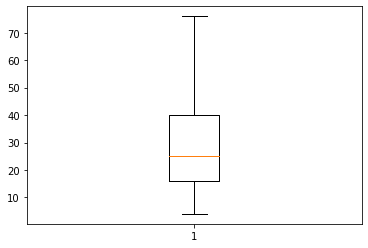

In [21]:
new = list(zip(point,column))
new = sorted(new,key=(lambda x:x[0]))
s_list = [i[1] for i in new]
for i, x in enumerate(s_list):
    if x == '':
        s_list[i] = s_list[i-1]
s_list = list(map(float, s_list))
plt.boxplot(s_list,showfliers = False)

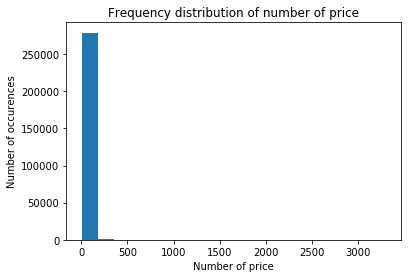

In [22]:
draw_hist(s_list,'price')